In [0]:
train_df = spark.read.format("csv").option("header", "true").option("inferschema",True).load("dbfs:/FileStore/211")
train_df.show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|        0.33|   20|
|  F| 0.545|   0.425| 0.125|       0.768|         0.294|        0.1495|        0.26|   16|

In [0]:
train_df.describe().show()


+-------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+
|summary| Sex|             Length|           Diameter|             Height|       Whole weight|     Shucked weight|     Viscera weight|       Shell weight|             Rings|
+-------+----+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+
|  count|4177|               4177|               4177|               4177|               4177|               4177|               4177|               4177|              4177|
|   mean|null| 0.5239920995930099|  0.407881254488869| 0.1395163993296614|   0.82874215944458|0.35936748862820106|0.18059360785252604|0.23883085946851795| 9.933684462532918|
| stddev|null|0.12009291256479936|0.09923986613365941|0.04182705660725731|0.49038901823099795|0.22196294903322014|0.10961425025968

In [0]:
num_rows = train_df.count()
num_cols = len(train_df.columns)
print("The shape of the DataFrame is ({}, {})".format(num_rows, num_cols))

The shape of the DataFrame is (4177, 9)


In [0]:
from pyspark.sql.functions import isnan, when, count, col

train_df.select([count(when(isnan(c), c)).alias(c) for c in train_df.columns]).show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
|  0|     0|       0|     0|           0|             0|             0|           0|    0|
+---+------+--------+------+------------+--------------+--------------+------------+-----+



In [0]:
train_df = train_df.withColumn("Gender", when(train_df.Sex == "M", 0).when(train_df.Sex == "F", 1).otherwise(2))
train_df = train_df.withColumn("Age", col("Rings") + 1.5)
train_df.show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+------+----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|Gender| Age|
+---+------+--------+------+------------+--------------+--------------+------------+-----+------+----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|     0|16.5|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|     0| 8.5|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|     1|10.5|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|     0|11.5|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|     2| 8.5|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8|     2| 9.5|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|  

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df_pandas = train_df.toPandas()
corr = train_df_pandas.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Gender,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.448765,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.458245,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.417928,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.461238,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.440927,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.454658,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.445549,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.351822,1.000000
Gender,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822,1.000000,-0.351822
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.351822,1.000000


Out[15]: <AxesSubplot:>

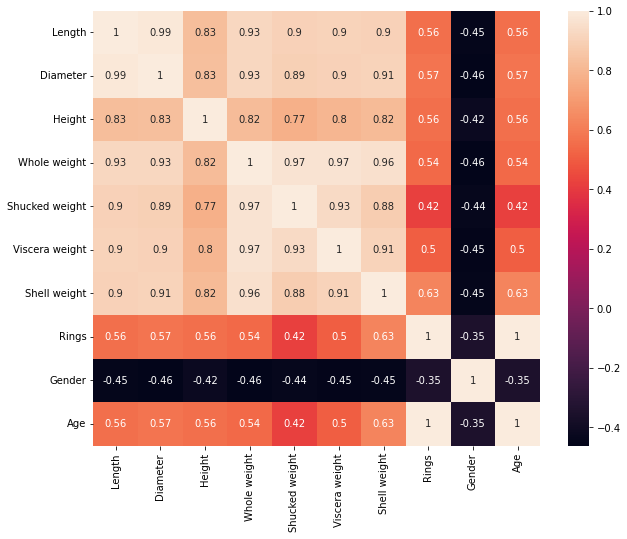

In [0]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, ax=ax)

In [0]:
train_df = train_df.drop('Shucked weight','Viscera weight','Shell weight','Sex','Rings')
train_df.show()

+------+--------+------+------------+------+----+
|Length|Diameter|Height|Whole weight|Gender| Age|
+------+--------+------+------------+------+----+
| 0.455|   0.365| 0.095|       0.514|     0|16.5|
|  0.35|   0.265|  0.09|      0.2255|     0| 8.5|
|  0.53|    0.42| 0.135|       0.677|     1|10.5|
|  0.44|   0.365| 0.125|       0.516|     0|11.5|
|  0.33|   0.255|  0.08|       0.205|     2| 8.5|
| 0.425|     0.3| 0.095|      0.3515|     2| 9.5|
|  0.53|   0.415|  0.15|      0.7775|     1|21.5|
| 0.545|   0.425| 0.125|       0.768|     1|17.5|
| 0.475|    0.37| 0.125|      0.5095|     0|10.5|
|  0.55|    0.44|  0.15|      0.8945|     1|20.5|
| 0.525|    0.38|  0.14|      0.6065|     1|15.5|
|  0.43|    0.35|  0.11|       0.406|     0|11.5|
|  0.49|    0.38| 0.135|      0.5415|     0|12.5|
| 0.535|   0.405| 0.145|      0.6845|     1|11.5|
|  0.47|   0.355|   0.1|      0.4755|     1|11.5|
|   0.5|     0.4|  0.13|      0.6645|     0|13.5|
| 0.355|    0.28| 0.085|      0.2905|     2| 8.5|


In [0]:
train_df = train_df.select("Length",
                           "Diameter",
                           "Height",
                           "Whole weight",
                           "Gender",
                           "Age")
                           
                           

In [0]:
featureCols = ["Length", "Diameter", "Height", "Whole weight", "Gender"]

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

In [0]:
assembler = VectorAssembler(inputCols=featureCols, outputCol="features") 

In [0]:
assembled_df = assembler.transform(train_df)

In [0]:
assembled_df.show(10, truncate=False)

+------+--------+------+------------+------+----+-----------------------------+
|Length|Diameter|Height|Whole weight|Gender|Age |features                     |
+------+--------+------+------------+------+----+-----------------------------+
|0.455 |0.365   |0.095 |0.514       |0     |16.5|[0.455,0.365,0.095,0.514,0.0]|
|0.35  |0.265   |0.09  |0.2255      |0     |8.5 |[0.35,0.265,0.09,0.2255,0.0] |
|0.53  |0.42    |0.135 |0.677       |1     |10.5|[0.53,0.42,0.135,0.677,1.0]  |
|0.44  |0.365   |0.125 |0.516       |0     |11.5|[0.44,0.365,0.125,0.516,0.0] |
|0.33  |0.255   |0.08  |0.205       |2     |8.5 |[0.33,0.255,0.08,0.205,2.0]  |
|0.425 |0.3     |0.095 |0.3515      |2     |9.5 |[0.425,0.3,0.095,0.3515,2.0] |
|0.53  |0.415   |0.15  |0.7775      |1     |21.5|[0.53,0.415,0.15,0.7775,1.0] |
|0.545 |0.425   |0.125 |0.768       |1     |17.5|[0.545,0.425,0.125,0.768,1.0]|
|0.475 |0.37    |0.125 |0.5095      |0     |10.5|[0.475,0.37,0.125,0.5095,0.0]|
|0.55  |0.44    |0.15  |0.8945      |1  

In [0]:
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)
scaled_df.select("features", "features_scaled").show(10, truncate=False)


+-----------------------------+----------------------------------------------------------------------------------------------+
|features                     |features_scaled                                                                               |
+-----------------------------+----------------------------------------------------------------------------------------------+
|[0.455,0.365,0.095,0.514,0.0]|[3.788733159040444,3.6779573997853476,2.2712571169427402,1.0481474521068497,0.0]              |
|[0.35,0.265,0.09,0.2255,0.0] |[2.914410122338803,2.6702978382003213,2.1517172686825963,0.4598390086577716,0.0]              |
|[0.53,0.42,0.135,0.677,1.0]  |[4.413249613827331,4.232170158657112,3.2275759030238946,1.380536624662135,1.2079998080979355] |
|[0.44,0.365,0.125,0.516,0.0] |[3.6638298680830665,3.6779573997853476,2.988496206503606,1.0522258468621293,0.0]              |
|[0.33,0.255,0.08,0.205,2.0]  |[2.7478724010623,2.5695318820418183,1.9126375721623077,0.41803546241615597,2.415

In [0]:
train_data, test_data = scaled_df.randomSplit([.8,.2])

In [0]:
train_data.columns

Out[46]: ['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Gender',
 'Age',
 'features',
 'features_scaled']

In [0]:
from pyspark.ml.regression import LinearRegression
lr = (LinearRegression(featuresCol='features_scaled', labelCol="Age", predictionCol='predAge', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False))

In [0]:
linearModel = lr.fit(train_data)

In [0]:
linearModel.coefficients

Out[53]: DenseVector([0.0026, 0.9956, 0.5609, 0.0, -0.1691])

In [0]:
featureCols

Out[54]: ['Length', 'Diameter', 'Height', 'Whole weight', 'Gender']

In [0]:
linearModel.intercept

Out[55]: 5.654052811639065

In [0]:
predictions = linearModel.transform(test_data)

In [0]:
predandlabels = predictions.select("predAge", "Age")

In [0]:
predandlabels.show()

+------------------+---+
|           predAge|Age|
+------------------+---+
| 7.089130150203738|5.5|
| 6.687886141452022|5.5|
| 6.855366562930389|4.5|
| 7.123550156402408|4.5|
| 7.448085254283619|5.5|
| 7.173930860651808|6.5|
| 7.140382548822306|6.5|
| 7.140600472414598|5.5|
| 7.783481944424936|5.5|
|  7.37512679226097|5.5|
| 7.291197776182067|5.5|
|7.3413605568391755|5.5|
| 7.492444433082229|6.5|
| 7.408515417003326|4.5|
| 7.833971610470481|4.5|
|7.4925533948783745|6.5|
| 7.626485504527238|5.5|
| 7.710523482402287|5.5|
|   7.7269200276376|6.5|
| 8.102213440447649|8.5|
+------------------+---+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import round

predandlabels = predandlabels.withColumn("Rounded_pred_Age", round(predandlabels["PredAge"], 2))
predandlabels = predandlabels.drop('PredAge')

In [0]:
predandlabels.show()

+---+----------------+
|Age|Rounded_pred_Age|
+---+----------------+
|5.5|            7.09|
|5.5|            6.69|
|4.5|            6.86|
|4.5|            7.12|
|5.5|            7.45|
|6.5|            7.17|
|6.5|            7.14|
|5.5|            7.14|
|5.5|            7.78|
|5.5|            7.38|
|5.5|            7.29|
|5.5|            7.34|
|6.5|            7.49|
|4.5|            7.41|
|4.5|            7.83|
|6.5|            7.49|
|5.5|            7.63|
|5.5|            7.71|
|6.5|            7.73|
|8.5|             8.1|
+---+----------------+
only showing top 20 rows



In [0]:
print("RMSE: {0}".format(linearModel.summary.rootMeanSquaredError))

RMSE: 2.6152880501183127


In [0]:
print("MAE: {0}".format(linearModel.summary.meanAbsoluteError))

MAE: 1.8858244878262844


In [0]:
print("R2: {0}".format(linearModel.summary.r2))

R2: 0.3415816357693504


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
evaluator = RegressionEvaluator(predictionCol="predAge", labelCol='Age', metricName='rmse')
print("RMSE: {0}".format(evaluator.evaluate(predandlabels)))

RMSE: 2.5778156720535867


In [0]:
evaluator = RegressionEvaluator(predictionCol="predAge", labelCol='Age', metricName='mae')
print("MAE: {0}".format(evaluator.evaluate(predandlabels)))

MAE: 1.8541412012692755


In [0]:
evaluator = RegressionEvaluator(predictionCol="predAge", labelCol='Age', metricName='r2')
print("R2: {0}".format(evaluator.evaluate(predandlabels)))

R2: 0.36179380532302285
